[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FlorianMarquardt/machine-learning-for-physicists/blob/master/2024/01_tutorial_CurveFitting.ipynb)

# Nonlinear curve fitting via stochastic gradient descent

Example code for the lecture series "Machine Learning for Physicists" by Florian Marquardt

Lecture 1, 2024 Tutorials

This notebook shows how stochastic gradient descent can help fit an arbitrary function (neural networks essentially do the same, but in much higher dimensions and with many more parameters).

##### Import all necessary libraries

In [1]:
import numpy as np

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display


from IPython.display import clear_output
from time import sleep

##### Define the target function to be fitted


We define here the target function as $f(x) = \dfrac{3}{(x-0.5)^2 +1}$.

In [2]:
def true_f(x):
    return( 3.0/((x-0.5)**2+1.0) )

##### Define the parametrized nonlinear function

Here we consider a parametrized function $F(x) [\theta] = \dfrac{\theta_0}{(x - \theta_1)^2+1}$, with a vector $\theta$ of parameters $\theta = (\theta_0, \theta_1)$.

In [3]:
def f(theta,x):
    """
    theta are the parameters
    x are the input values (can be an array)
    """
    return(theta[0]/((x-theta[1])**2+1.0))

##### Define the gradients of the function


We analytically calculate the derivative of $f[\theta]$ with respect to its parameters: 

$\partial f / \partial \theta_0 = \dfrac{1}{(x - \theta_1)^2+1}$ 

and 

$\partial f / \partial \theta_1 = \dfrac{2 (x - \theta_1) \theta_0}{[(x - \theta_1)^2+1]^2}$.

The gradient vector is defined as $\nabla_\theta f[\theta] = (\partial f / \partial \theta_0, \partial f / \partial \theta_1)$.

In [4]:
def f_grad(theta,x):
    """
    Return the gradient of f with respect to theta
    shape [n_theta,n_samples]
    where n_theta=len(theta)
    and n_samples=len(x)
    """
    grad0 = 1./((x-theta[1])**2+1.0)
    grad1 = 2*(x-theta[1])*theta[0]/((x-theta[1])**2+1.0)**2

    return(np.array([grad0, grad1]))

##### Perform the parameters' optimization procedure with stochastic gradient descent 

Get randomly sampled x values

In [5]:
def samples(nsamples,width):
    return(width*np.random.randn(nsamples))

Define the average cost function on a grid of 2 parameters

$c (\theta) = \langle C (x, \theta) \rangle_x$

with 

$C (x, \theta) = \left( F(x)[\theta] - f(x) \right)^2 / 2$

In [6]:
def get_avg_cost(theta0s,theta1s,nsamples, width):
    n0=len(theta0s)
    n1=len(theta1s)
    C=np.zeros([n0,n1])
    for j0 in range(n0):
        for j1 in range(n1):
            theta=np.array([theta0s[j0],theta1s[j1]])
            x=samples(nsamples,width)
            C[j0,j1]=0.5*np.average((f(theta,x)-true_f(x))**2)
    return(C)

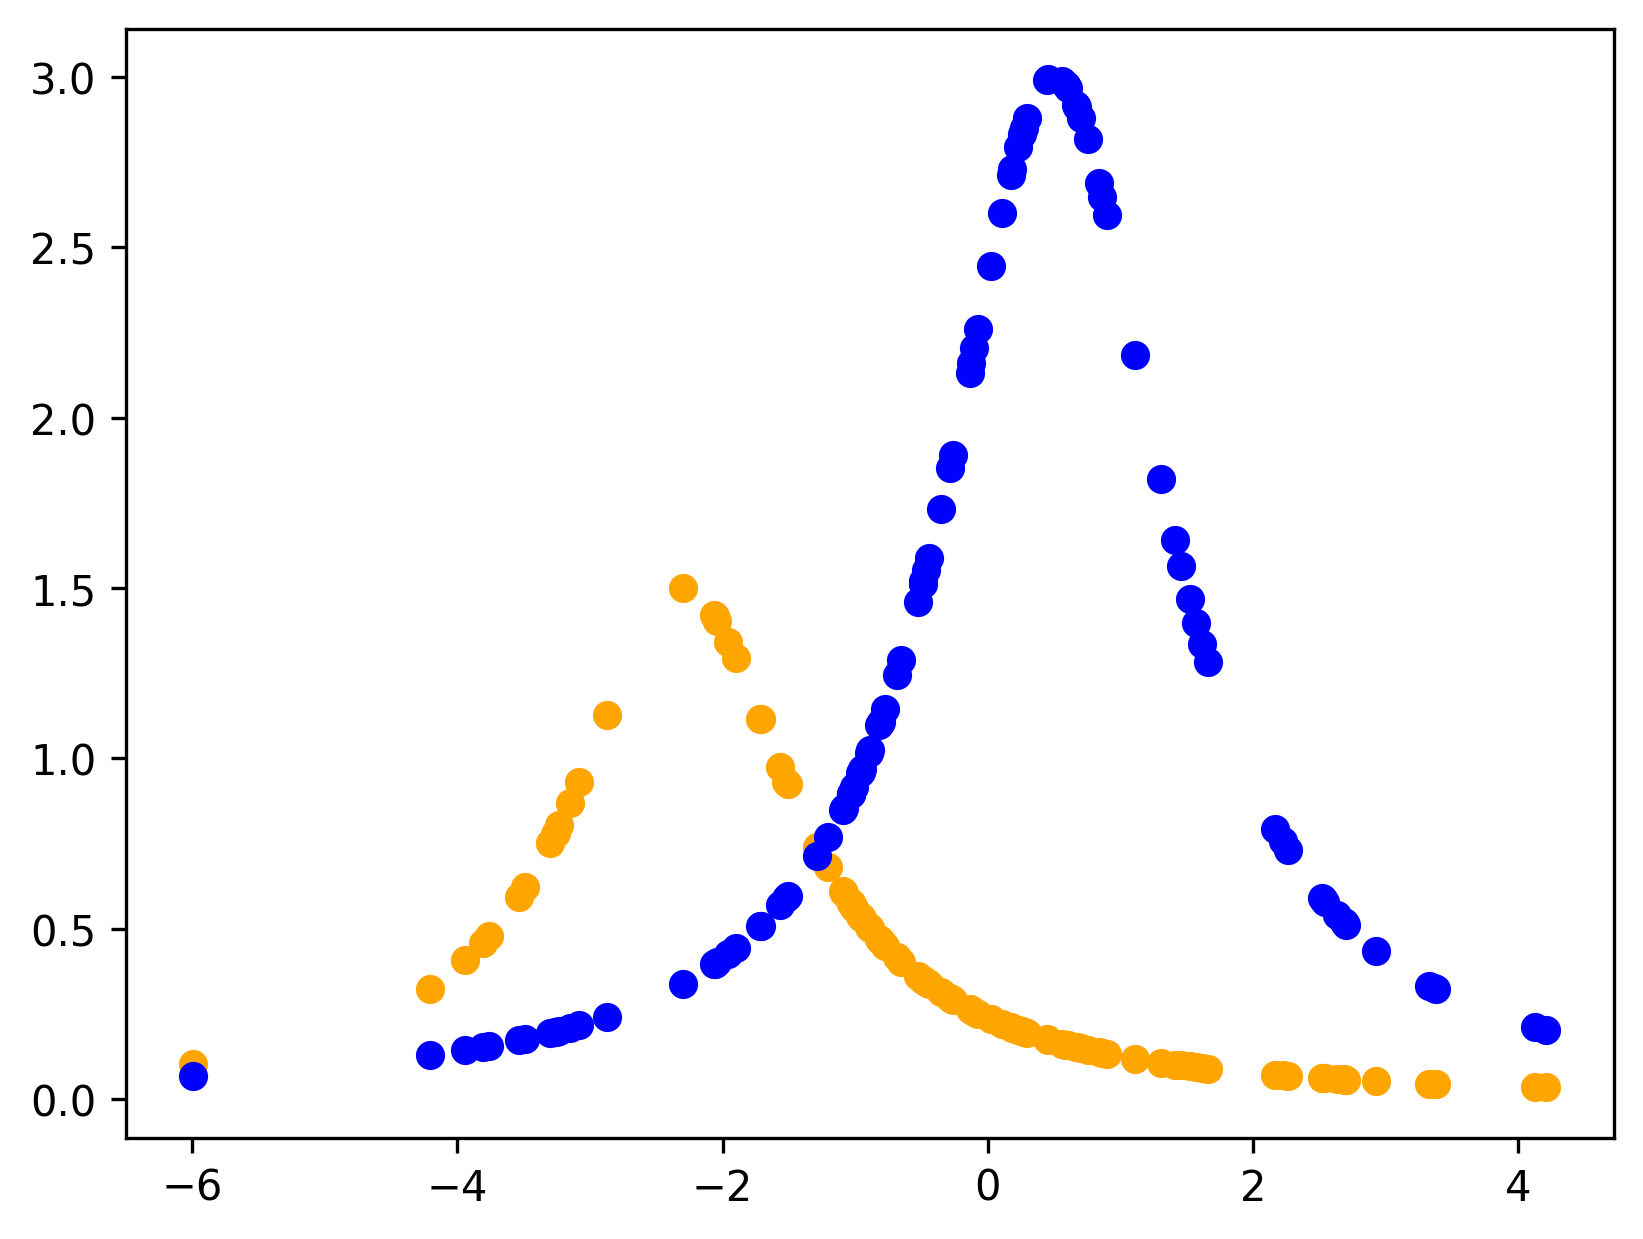

In [7]:
# take arbitrary parameters as starting point
theta=np.array([1.5,-2.3])

x=samples(100,2.)
# illustrate the parametrized function, at sampled points,
# compare against actual function
plt.scatter(x,f(theta,x),color="orange")
plt.scatter(x,true_f(x),color="blue")
plt.show()

Plot the cost function landscape

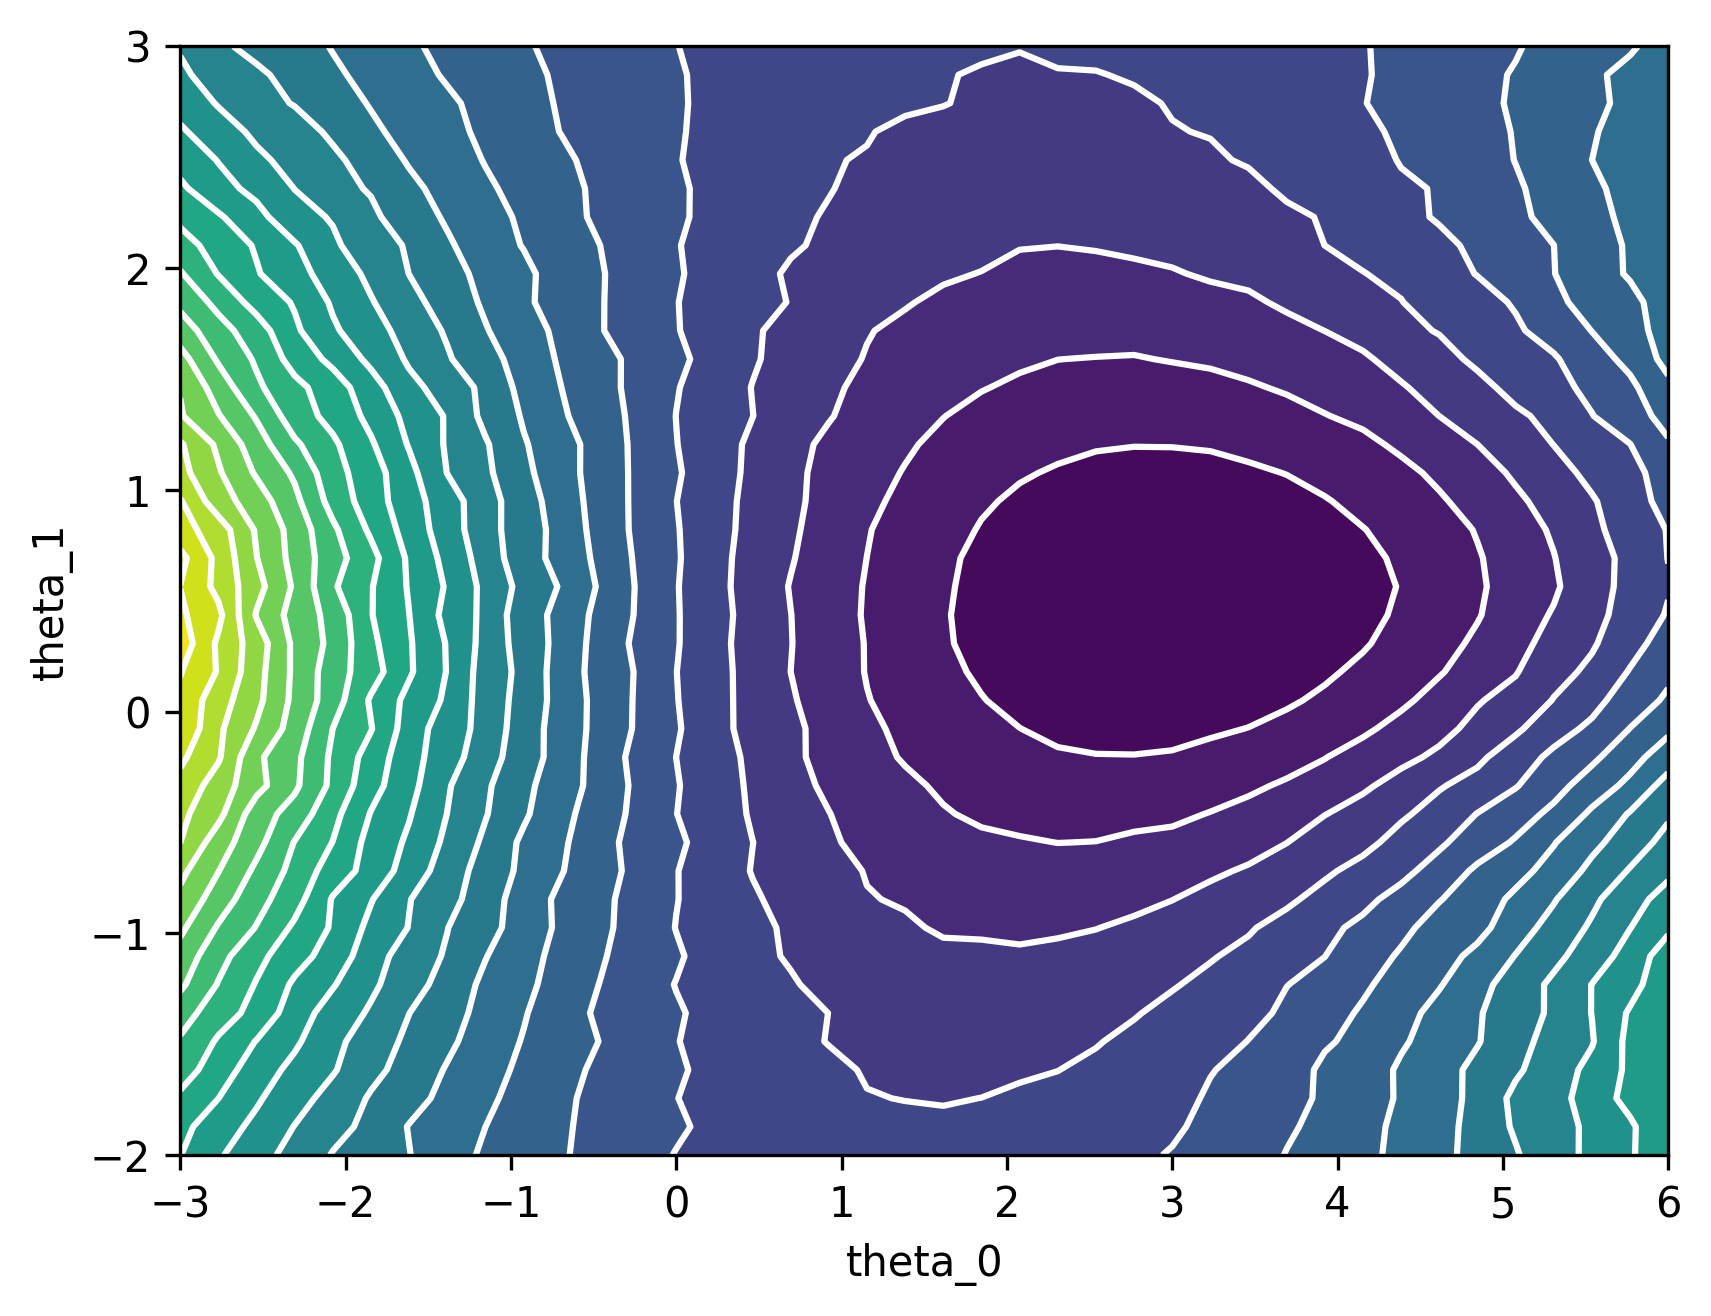

In [8]:
theta0s=np.linspace(-3,6,40)
theta1s=np.linspace(-2,3,40)
C=get_avg_cost(theta0s,theta1s,10000, 2.)
nlevels=20
X,Y=np.meshgrid(theta0s,theta1s,indexing='ij')
plt.contourf(X,Y,C,nlevels)
plt.contour(X,Y,C,nlevels,colors="white")
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.show()

Perform stochastic gradient descent and visualize the progress and the function

Start with random values $\theta = (\theta_0, \theta_1)$ and updated them according to the averaged stochastic gradients:

$\theta^{(n+1)} = \theta^{(n)} - \eta \ \partial c(\theta) / \partial \theta$ ,

which results into 

$\theta^{(n+1)} = \theta^{(n)} - \eta \ \langle ( F(x)[\theta] - f(x) ) \cdot \nabla_\theta F(x)[\theta] \rangle_x$.

In [ ]:
# take arbitrary parameters as starting point in a given range
theta0_range = 1.
theta1_range = 2.
theta=np.array([theta0_range,theta1_range])*np.random.rand(2)

eta=.2 # "learning rate" (gradient descent step size)
nsamples=10 # stochastic x samples used per step
nsteps=1000 # how many steps we take

x_sweep=np.linspace(-4,4,300)
xrange = 2.

for n in range(nsteps):
    
    x=samples(nsamples, xrange) # get random samples

    # deviation from true function (vector):
    deviation=f(theta,x)-true_f(x)

    # do one gradient descent step:
    theta-=eta*np.average(deviation[None,:]*f_grad(theta,x),axis=1)


    # Now: Plotting
    # compare true function (blue) against
    # parametrized function (orange)
    # blue dots indicate random points where
    # the true function was sampled in this step
    
    clear_output(wait=True)
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(8,2))
    
    nlevels=20
    ax[0].contourf(X,Y,C,nlevels)
    ax[0].contour(X,Y,C,nlevels,colors="white")
    ax[0].scatter([theta[0]],[theta[1]],color="orange")
    ax[0].set_xlim(theta0s[0],theta0s[-1])
    ax[0].set_ylim(theta1s[0],theta1s[-1])
    ax[0].set_xlabel("theta_0")
    ax[0].set_ylabel("theta_1")    
    
    ax[1].plot(x_sweep,true_f(x_sweep),color="blue")
    ax[1].scatter(x,true_f(x),color="blue")
    ax[1].plot(x_sweep,f(theta,x_sweep),color="orange")
    ax[1].set_xlim(-4,4)
    ax[1].set_ylim(0.0,4.0)
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("f") 
    
    plt.show()
    sleep(0.3)
    
print(theta) #print the final fitted values

Additional activities:

1. Implement a gradient descent algorithm which stops only when it well approximates the function within some tolerance.
2. Find the minimum number of steps to reach convergence for different tolerance values.
3. How does the learning rate affects the convergence speed? Make some tests. 
4. Implement a learning schedule for the learning rate, e.g.: $\eta = \eta_0 t_1/(t+t_1)$ with parameters $t_0, t_1$ and step index $t$.
5. Try to optimize more than 2 parameters at once of a given function (you can re-use the same function of the given example). 
6. Try to fit a sinusoidal function, e.g.: $\sin(\omega x + x_0)$, where $\omega$ and $x_0$ are the parameters to be optimized.
7. Try to solve the problem at 5. creating a batch of training function with different random initial values.

##### Sinusoidal function fitting

In [ ]:
def true_f(x):
    return( np.sin(5.*x+1.0) ) 

def f(theta,x):
    return( np.sin(theta[0]*x+theta[1]) )

def f_grad(theta,x):
    grad0 = x*np.cos(theta[0]*x+theta[1])
    grad1 = np.ones(len(x))
    return(np.array([grad0, grad1]))

In [ ]:
def samples(nsamples, width):
    return(width*np.random.randn(nsamples))

def get_avg_cost(theta0s,theta1s,nsamples, width):
    n0=len(theta0s)
    n1=len(theta1s)
    C=np.zeros([n0,n1])
    for j0 in range(n0):
        for j1 in range(n1):
            theta=np.array([theta0s[j0],theta1s[j1]])
            x=samples(nsamples, width)
            C[j0,j1]=0.5*np.average((f(theta,x)-true_f(x))**2)
    return(C)

In [ ]:
# get average cost function:
theta0s=np.linspace(-10,10,100)
theta1s=np.linspace(-2,2,40)
C=get_avg_cost(theta0s,theta1s,10000, 2.)
nlevels=20
X,Y=np.meshgrid(theta0s,theta1s,indexing='ij')
plt.contourf(X,Y,C,nlevels)
plt.contour(X,Y,C,nlevels,colors="white")
plt.xlabel("theta_0")
plt.ylabel("theta_1")
plt.show()

In [ ]:
# take arbitrary parameters as starting point
theta=np.array([10.,2.])*np.random.rand(2)
print('Initial values:', theta)

eta=.2 # "learning rate" (gradient descent step size)
nsamples=10 # stochastic x samples used per step
nsteps=10000 # how many steps we take

x_sweep=np.linspace(-4,4,300)
xrange = 2.

for n in range(nsteps):
    x=samples(nsamples, xrange) # get random samples
    # deviation from true function (vector):
    deviation=f(theta,x)-true_f(x)
    # do one gradient descent step:
    theta-=eta*np.average(deviation[None,:]*f_grad(theta,x),axis=1)

    # Now: Plotting
    # compare true function (blue) against
    # parametrized function (orange)
    # blue dots indicate random points where
    # the true function was sampled in this step
    clear_output(wait=True)
    fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(8,2))
    
    nlevels=20
    ax[0].contourf(X,Y,C,nlevels)
    ax[0].contour(X,Y,C,nlevels,colors="white")
    ax[0].scatter([theta[0]],[theta[1]],color="orange")
    ax[0].set_xlim(theta0s[0],theta0s[-1])
    ax[0].set_ylim(theta1s[0],theta1s[-1])
    ax[0].set_xlabel("theta_0")
    ax[0].set_ylabel("theta_1")    
    
    ax[1].plot(x_sweep,true_f(x_sweep),color="blue")
    ax[1].scatter(x,true_f(x),color="blue")
    ax[1].plot(x_sweep,f(theta,x_sweep),color="orange")
    ax[1].set_xlim(-4,4)
    ax[1].set_ylim(-2.0,2.0)
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("f") 
    
    plt.show()
    sleep(0.3)
    
print(theta)

##### Curve fitting with 3 parameters 

In [ ]:
def true_f(x):
    return( 3.0/((x-0.5)**2+1.0) )

def f(theta,x):
    return(theta[0]/((x-theta[1])**2+theta[2]))

def f_grad(theta,x):
    grad0 = 1./((x-theta[1])**2+theta[2])
    grad1 = 2*(x-theta[1])*theta[0]/((x-theta[1])**2+theta[2])**2
    grad2 = -theta[0]/((x-theta[1])**2+theta[2])**2

    return(np.array([grad0, grad1, grad2]))

In [ ]:
def samples(nsamples,width):
    return(width*np.random.randn(nsamples))
    
def get_avg_cost(theta0s,theta1s, nsamples, width):
    n0=len(theta0s)
    n1=len(theta1s)
    C0=np.zeros([n0,n1])
    C1=np.zeros([n0,n1])
    for j0 in range(n0):
        for j1 in range(n1):
            theta=np.array([theta0s[j0],theta1s[j1],1.])
            x=samples(nsamples, width)
            C0[j0,j1]=0.5*np.average((f(theta,x)-true_f(x))**2)
    for j0 in range(n0):
        for j1 in range(n1):
            theta=np.array([theta0s[j0],0.5,theta1s[j1]])
            x=samples(nsamples, width)
            C1[j0,j1]=0.5*np.average((f(theta,x)-true_f(x))**2)
    return(C0, C1)


In [ ]:
# get average cost function:
theta0s=np.linspace(-3,6,40)
theta1s=np.linspace(-2,3,40)
theta2s=np.linspace(0.5,1.5,40)
C0,_=get_avg_cost(theta0s,theta1s,10000, 2.)
_,C1=get_avg_cost(theta0s,theta2s,10000, 2.)
nlevels=20
X,Y=np.meshgrid(theta0s,theta1s,indexing='ij')
X,Z=np.meshgrid(theta0s,theta2s,indexing='ij')

plt.contourf(X,Z,C1,nlevels)
plt.contour(X,Z,C1,nlevels,colors="white")
plt.xlabel("theta_0")
plt.ylabel("theta_2")
plt.show()

In [ ]:
make_plot = False

# take arbitrary parameters as starting point
theta=np.array([-1.0,2.0,0.4])

eta=.2 # "learning rate" (gradient descent step size)
nsamples=10 # stochastic x samples used per step
nsteps=10000 # how many steps we take

tolerance = 0.05

x_sweep=np.linspace(-4,4,400)
xrange = 2.

for n in range(nsteps):
    x=samples(nsamples, xrange) 
    deviation=f(theta,x)-true_f(x)
    theta-=eta*np.average(deviation[None,:]*f_grad(theta,x),axis=1)

    
    if make_plot:
        clear_output(wait=True)
        fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,2))
        
        nlevels=20
        ax[0].contourf(X,Y,C0,nlevels)
        ax[0].contour(X,Y,C0,nlevels,colors="white")
        ax[0].scatter([theta[0]],[theta[1]],color="orange")
        ax[0].set_xlim(theta0s[0],theta0s[-1])
        ax[0].set_ylim(theta1s[0],theta1s[-1])
        ax[0].set_xlabel("theta_0")
        ax[0].set_ylabel("theta_1")    
        
        ax[1].contourf(X,Z,C1,nlevels)
        ax[1].contour(X,Z,C1,nlevels,colors="white")
        ax[1].scatter([theta[0]],[theta[2]],color="orange")
        ax[1].set_xlim(theta0s[0],theta0s[-1])
        ax[1].set_ylim(theta2s[0],theta2s[-1])
        ax[1].set_xlabel("theta_0")
        ax[1].set_ylabel("theta_2") 

        ax[2].plot(x_sweep,true_f(x_sweep),color="blue")
        ax[2].scatter(x,true_f(x),color="blue")
        ax[2].plot(x_sweep,f(theta,x_sweep),color="orange")
        ax[2].set_xlim(-4,4)
        ax[2].set_ylim(0.0,4.0)
        ax[2].set_xlabel("x")
        ax[2].set_ylabel("f") 
        
        plt.show()
        sleep(0.3)

print(theta)

In [ ]:
make_plot = False

theta=np.array([-1.0,2.0,0.4])

eta=.2 # "learning rate" (gradient descent step size)
nsamples=10 # stochastic x samples used per step

tolerance = 1E-3
i = 0
x_sweep=np.linspace(-4,4,400)
xrange = 2.

fidelity = 10. 
while fidelity > tolerance:
    x=samples(nsamples, xrange) # get random samples
    fidelity=np.average((f(theta,x)-true_f(x))**2./2.)
    deviation=f(theta,x)-true_f(x)
    theta-=eta*np.average(deviation[None,:]*f_grad(theta,x),axis=1)
    
    i+=1

    if make_plot:
        clear_output(wait=True)
        fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(12,2))
        
        nlevels=20
        ax[0].contourf(X,Y,C0,nlevels)
        ax[0].contour(X,Y,C0,nlevels,colors="white")
        ax[0].scatter([theta[0]],[theta[1]],color="orange")
        ax[0].set_xlim(theta0s[0],theta0s[-1])
        ax[0].set_ylim(theta1s[0],theta1s[-1])
        ax[0].set_xlabel("theta_0")
        ax[0].set_ylabel("theta_1")    
        
        ax[1].contourf(X,Z,C1,nlevels)
        ax[1].contour(X,Z,C1,nlevels,colors="white")
        ax[1].scatter([theta[0]],[theta[2]],color="orange")
        ax[1].set_xlim(theta0s[0],theta0s[-1])
        ax[1].set_ylim(theta2s[0],theta2s[-1])
        ax[1].set_xlabel("theta_0")
        ax[1].set_ylabel("theta_2") 

        ax[2].plot(x_sweep,true_f(x_sweep),color="blue")
        ax[2].scatter(x,true_f(x),color="blue")
        ax[2].plot(x_sweep,f(theta,x_sweep),color="orange")
        ax[2].set_xlim(-4,4)
        ax[2].set_ylim(0.0,4.0)
        ax[2].set_xlabel("x")
        ax[2].set_ylabel("f") 
        
        plt.show()
        sleep(0.3)

print('Set of parameters:',theta)
print('Final fidelity:', fidelity)
print('Number of steps:', i)

plt.plot(x_sweep,true_f(x_sweep),color="blue")
plt.plot(x_sweep,f(theta,x_sweep),color="orange")